In [95]:
import geopandas as gpd

In [96]:
url = "https://www.datos.gov.co/resource/9vha-vh9n.geojson"
hurtos_colombia = gpd.read_file(url)
hurtos_colombia = hurtos_colombia.set_index("codigo_dane")
hurtos_colombia

,genero,municipio,fecha_hecho,cantidad,tipo_de_hurto,armas_medios,grupo_etario,departamento,geometry
codigo_dane,,,,,,,,,
05001000,NO APLICA,MEDELLÍN (CT),1/01/2010,1,HURTO AUTOMOTORES,ARMA DE FUEGO,NO APLICA,ANTIOQUIA,None
05212000,NO APLICA,COPACABANA,1/01/2010,1,HURTO AUTOMOTORES,LLAVE MAESTRA,NO APLICA,ANTIOQUIA,None
05001000,NO APLICA,MEDELLÍN (CT),1/01/2010,1,HURTO AUTOMOTORES,LLAVE MAESTRA,NO APLICA,ANTIOQUIA,None
11001000,NO APLICA,BOGOTÁ D.C. (CT),1/01/2010,1,HURTO AUTOMOTORES,LLAVE MAESTRA,NO APLICA,CUNDINAMARCA,None
76001000,NO APLICA,CALI (CT),1/01/2010,1,HURTO AUTOMOTORES,LLAVE MAESTRA,NO APLICA,VALLE,None
...,...,...,...,...,...,...,...,...,...
52001000,NO APLICA,PASTO (CT),9/03/2010,1,HURTO AUTOMOTORES,ARMA DE FUEGO,NO APLICA,NARIÑO,None
76001000,NO APLICA,CALI (CT),9/03/2010,2,HURTO AUTOMOTORES,ARMA DE FUEGO,NO APLICA,VALLE,None
54001000,NO APLICA,CÚCUTA (CT),9/03/2010,1,HURTO AUTOMOTORES,CONTUNDENTES,NO APLICA,NORTE DE SANTANDER,None


In [115]:
hurtos_colombia_agrupados = hurtos_colombia.groupby("codigo_dane")["municipio"].agg(['count'])
hurtos_colombia_agrupados

,count
codigo_dane,
05001000,128
05042000,1
05079000,1
05088000,25
05129000,4
...,...
81736000,2
81794000,1
85001000,1


In [98]:
municipios = gpd.read_file(r"C:\Users\JuanMa\Documents\JuanMa\Dev\AnacondaProjects\GeoPandas\Datos\COL_Municipio.zip")
municipios = municipios.set_index("cod_dane")
municipios

,ID,TOTPOP_CY,Shape__Are,Shape__Len,geometry
cod_dane,,,,,
05001000,05001,2559097,3.798647e+08,1.072579e+05,"POLYGON ((-8423087.868 710530.773, -8423036.11..."
05002000,05002,20493,5.155810e+08,1.282157e+05,"POLYGON ((-8400992.107 663049.702, -8400902.90..."
05004000,05004,2763,2.935562e+08,8.885140e+04,"POLYGON ((-8469712.412 753218.991, -8469679.34..."
05021000,05021,4746,1.294922e+08,7.572552e+04,"POLYGON ((-8352494.010 715689.897, -8352304.86..."
05030000,05030,31600,8.456353e+07,5.066772e+04,"POLYGON ((-8425665.892 679202.380, -8425597.03..."
...,...,...,...,...,...
97889000,97889,1108,4.669929e+09,4.292950e+05,"POLYGON ((-7759205.373 123549.666, -7759311.32..."
99001000,99001,20500,1.234376e+10,6.149489e+05,"POLYGON ((-7546884.015 705017.769, -7546632.27..."
99524000,99524,9705,1.844082e+10,8.362720e+05,"POLYGON ((-7684507.959 690786.085, -7684118.07..."


In [99]:
test = municipios.merge(hurtos_colombia_agrupados, left_on='cod_dane', right_on='codigo_dane')
test

,ID,TOTPOP_CY,Shape__Are,Shape__Len,geometry,count
0,05001,2559097,3.798647e+08,107257.930213,"POLYGON ((-8423087.868 710530.773, -8423036.11...",128
1,05042,27276,5.316765e+08,125471.413085,"POLYGON ((-8441952.863 743091.782, -8441804.23...",1
2,05079,54898,2.097249e+08,81485.206070,"POLYGON ((-8384334.497 725596.988, -8384301.37...",1
3,05088,557749,1.453409e+08,64621.581687,"POLYGON ((-8414216.495 717391.965, -8414173.23...",25
4,05129,84268,1.392255e+08,59368.364351,"POLYGON ((-8422545.420 682512.115, -8422535.17...",4
...,...,...,...,...,...,...
143,81736,63642,9.369985e+08,141398.578301,"POLYGON ((-7990416.423 788601.725, -7988234.65...",2
144,81794,49465,5.470561e+09,423567.434778,"POLYGON ((-7987012.869 747921.729, -7986932.18...",1
145,85001,179489,2.520565e+09,340545.621006,"POLYGON ((-8059071.489 620962.532, -8058983.23...",1
146,85410,25428,2.419753e+09,463096.658534,"POLYGON ((-8099064.113 577685.563, -8098973.32...",3


In [116]:
test = test.sort_values(by = 'count', ascending = False)
test.head(3)

,ID,TOTPOP_CY,Shape__Are,Shape__Len,geometry,count
17,11001,7822431,1.657425e+09,414367.022837,"POLYGON ((-8245739.733 538942.534, -8245676.51...",216
125,76001,2275444,5.675798e+08,122261.000357,"POLYGON ((-8526382.122 395080.815, -8526235.24...",194
0,05001,2559097,3.798647e+08,107257.930213,"POLYGON ((-8423087.868 710530.773, -8423036.11...",128


<AxesSubplot:>

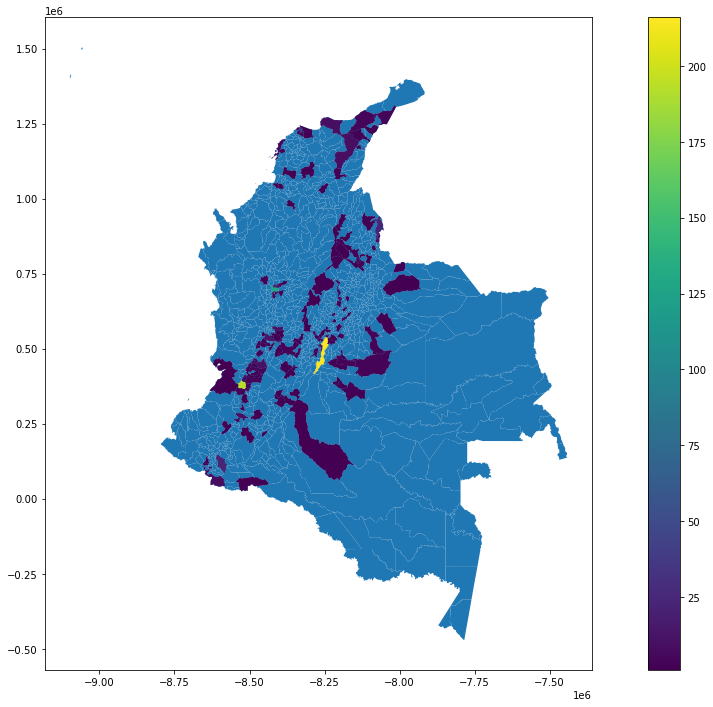

In [117]:
axis = municipios.plot(figsize = (20, 12))
test.plot(column = "count", ax = axis, legend = True)